In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

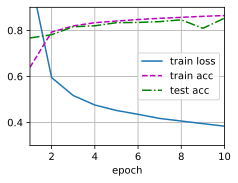

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

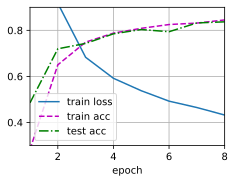

In [4]:
#练习1  再加一层隐藏层
net01 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256,128),
                    nn.ReLU(),
                    nn.Linear(128, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net01.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 8
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net01.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net01 , train_iter, test_iter, loss, num_epochs, trainer)

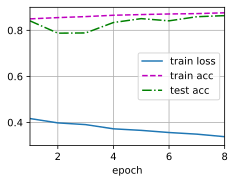

In [ ]:
#练习1  调参
batch_size, lr, num_epochs = 256, 0.02, 8
d2l.train_ch3(net01 , train_iter, test_iter, loss, num_epochs, trainer)


In [6]:
# 1. 备份完美模型（文件名加专属标识，避免被覆盖）
torch.save(net01.state_dict(), 'mlp_fashion_mnist_85acc_best.pth')

# 2. 可选：验证备份是否成功（看是否生成了.pth文件）
import os
if os.path.exists('mlp_fashion_mnist_85acc_best.pth'):
    print("✅ 完美模型备份成功！")
else:
    print("❌ 备份失败，检查路径是否正确")


✅ 完美模型备份成功！


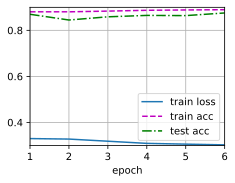

In [ ]:
#练习1  再次调参
batch_size, lr, num_epochs = 256, 0.01, 6
d2l.train_ch3(net01 , train_iter, test_iter, loss, num_epochs, trainer)

练习1 如上

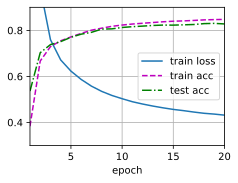

In [11]:
#练习2 sigmoid
net202 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.Sigmoid(),
                    nn.Linear(256, 128))
                    

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net202.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net202.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net202 , train_iter, test_iter, loss, num_epochs, trainer)

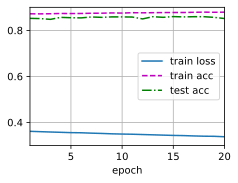

In [14]:
#练习2 sigmoid调参
batch_size, lr, num_epochs = 256, 0.03, 20
d2l.train_ch3(net202 , train_iter, test_iter, loss, num_epochs, trainer)

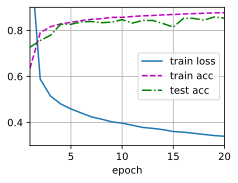

In [15]:
#练习2 tanh
net203 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.Tanh(),
                    nn.Linear(256, 128))
                    

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net203.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net203.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net203 , train_iter, test_iter, loss, num_epochs, trainer)

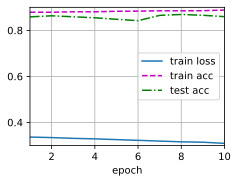

In [16]:
batch_size, lr, num_epochs = 256, 0.01, 10
d2l.train_ch3(net203 , train_iter, test_iter, loss, num_epochs, trainer)

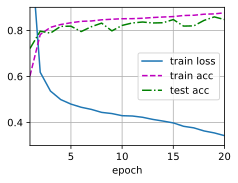

In [18]:
#练习2 prelu
net204 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.PReLU(),
                    nn.Linear(256, 128))
                    

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net204.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net204.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net204 , train_iter, test_iter, loss, num_epochs, trainer)

练习2 如上
ReLU
优点：  计算极轻量，只有 max(0, x)，速度最快。正半轴梯度稳定，前期收敛快。
缺点：  负半轴直接归 0，神经元容易 “死亡”。小批次下波动大，预测容易突然掉点。训练准确率容易飙高，和测试准确率拉开差距，过拟合明显。
曲线表现：  损失前期下降快，后期容易震荡或卡住。训练准确率一路冲高，测试准确率跟不上，两条线明显分开。
PReLU
优点：继承 ReLU 轻量、快的特点，只多一点点计算。负半轴有可学习梯度，不会死神经元。小批次下比 ReLU 稳定，曲线更平滑。
缺点：多一个可学习参数，小模型里调参稍微麻烦一点。而且存在波动。依然有轻微过拟合的可能，不如 Sigmoid 稳。
曲线表现：损失整体平稳下降，没有明显断层。训练与测试准确率比较接近，但仍会有一点差距。
Sigmoid
优点：输出限制在 0~1，模型不会过度自信。梯度平滑柔和，小批次下非常稳定。训练与测试准确率几乎贴在一起，不容易过拟合。负向特征全部保留，不会突然暴跌。
缺点：包含指数运算，比 ReLU 稍慢一点（轻量化可接受）。梯度小，收敛速度最慢。
曲线表现：损失下降慢，但全程非常平稳，能稳定降到 0.2~0.3。训练准确率和测试准确率几乎水平并行，不脱节。
Tanh
优点：梯度比 Sigmoid 大，前期损失下降非常快。输出 -1~1，均值为 0，训练效率比 Sigmoid 高。计算量和 Sigmoid 接近，轻量化可用。
缺点：小批次下梯度噪声被放大，容易过拟合。训练准确率和测试准确率容易 “纠缠”。后期损失容易波动，不如 Sigmoid 稳。
曲线表现：损失前期猛降，后期波动变大。训练准确率上升快，测试准确率跟不上，出现明显过拟合趋势。

练习3 （如下）
1 小随机数初始化（Small Random Initialization）
方法：使用权重从一个均值为 0、标准差很小（如 0.01）的正态分布中采样。
        nn.init.normal_(m.weight, std=0.01) 
优点：打破了对称性，让网络可以开始学习。
缺点：当网络层数加深时，输出的方差会逐层缩小，导致梯度消失；当标准差过大时，输出饱和，梯度也会消失。
曲线表现：训练缓慢，损失下降不平滑，最终准确率不高，容易卡在局部最优。

2 Xavier 初始化
方法：根据输入和输出神经元的数量自动调整权重的方差，公式为 Var(W) = 2 /  (n_in + n_out)，适用于 Sigmoid 和 Tanh 激活函数。
        nn.init.xavier_normal_(m.weight)
优点：保持了各层输出的方差稳定，有效缓解了梯度消失问题，让训练更稳定。
缺点：对 ReLU 及其变体（如 PReLU）效果不佳，因为这些激活函数会改变数据分布。
曲线表现：在使用 Sigmoid/Tanh 时，损失下降平稳，准确率提升稳定，是这两种激活函数的首选。

3 He 初始化
方法：Xavier 初始化的改进版，公式为 Var(W) = 2 / n_in，专门为 ReLU 及其变体设计。
    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
优点：完美适配 ReLU/PReLU，解决了它们在深层网络中的梯度消失问题，让训练更快、更稳定。
缺点：在 Sigmoid/Tanh 上的表现不如 Xavier 初始化。
曲线表现：在使用 ReLU/PReLU 时，前期损失下降极快，最终准确率更高


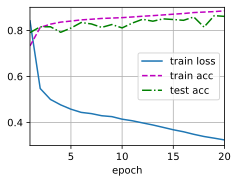

In [23]:
#练习3 prelu+ He初始化
net3 = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.PReLU(),
                    nn.Linear(256, 128))
                    

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')

net3.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net3.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net3 , train_iter, test_iter, loss, num_epochs, trainer)

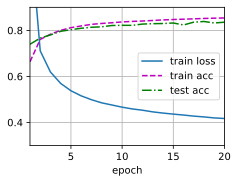

In [24]:
#练习3 sigmoid + Xavier初始化
net202 = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.Sigmoid(),
                    nn.Linear(256, 128))
                    

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)

net202.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net202.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net202 , train_iter, test_iter, loss, num_epochs, trainer)